In [ ]:
!pip install tensorflow opencv-python matplotlib

  Using cached matplotlib-3.8.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 791.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.9 MB/s eta 0:00:00
  Using cached grpcio-1.59.3-cp310-cp310-macosx_12_0_universal2.whl.metadata (4.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.2/155.2 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 2.2 MB/s eta 0:00:00a 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 156.0/208.8 MB 1.5 MB/s eta 0:00:35

In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [3]:
# GPU Limit

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# SKIP

In [6]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [101]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [Errno 17] File exists: 'data/positive'

In [18]:
os.listdir('lfw')

['German_Khan',
 'Stefano_Gabbana',
 'Dragan_Covic',
 'Jeff_Hornacek',
 'Sureyya_Ayhan',
 'Deb_Santos',
 'Bob_Newhart',
 'Wang_Hailan',
 'Paul_McNulty',
 'Jimmy_Iovine',
 'Claudia_Pechstein',
 'Ranil_Wickremasinghe',
 'Ben_Chandler',
 'Mark_Komara',
 'Rand_Beers',
 'Joanne_Woodward',
 'John_Bond',
 'Reginald_Hudlin',
 'Lee_Baca',
 'Mary-Kate_Olsen',
 'Emily_Stevens',
 'Xiang_Huaicheng',
 'Phil_Mickelson',
 'Gerry_Kelly',
 'Salma_Hayek',
 'Jim_Edmonds',
 'Martina_McBride',
 'Anthony_Pico',
 'Jose_Theodore',
 'Heidi_Fleiss',
 'Mark_Richt',
 'Mike_Smith',
 'Paul_ONeill',
 'Horace_Newcomb',
 'Mohammad_Fares',
 'JK_Rowling',
 'Shinya_Taniguchi',
 'Tony_Curtis',
 'Laurie_Pirtle',
 'Angel_Maza',
 'Ray_Sherman',
 'Nancy_Powell',
 'Kathryn_Tucker',
 'Gro_Harlem_Brundtland',
 'Jacqueline_Marris',
 'Mikhail_Gorbachev',
 'Takuma_Sato',
 'Ray_Lewis',
 'Hank_Aaron',
 'Chip_Knight',
 'Tracee_Treadwell',
 'Ronald_Young_Jr',
 'Gustavo_Cisneros',
 'Jack_Osbourne',
 'Isidro_Pastor',
 'Mike_Duke',
 'Natal

In [19]:
for directory in os.listdir('lfw'):
    if directory == '.DS_Store':
        continue
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

# Collect OpenCV Data

In [22]:
import uuid

In [28]:
uuid.uuid1(1)

UUID('2806fe14-9025-11ee-9025-000000000001')

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [10]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [11]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img) 
    
    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

InvalidArgumentError: {{function_node __wrapped__StatelessRandomUniformIntV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} minval must be 0-D, got shape [2] [Op:StatelessRandomUniformIntV2] name: 

# Load and Preprocess Images

In [7]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(3000)

2024-01-11 12:03:37.234049: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-11 12:03:37.234125: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-11 12:03:37.234145: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-11 12:03:37.234259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-11 12:03:37.234329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
dir_test = anchor.as_numpy_iterator()

In [9]:
print(dir_test.next())

b'data/anchor/9c00cdb4-aef1-11ee-8095-6e405208cd1e.jpg'


In [10]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [11]:
img = preprocess('data/anchor/9c00cdb4-aef1-11ee-8095-6e405208cd1e.jpg')

In [12]:
img.numpy().max() 

0.99019605

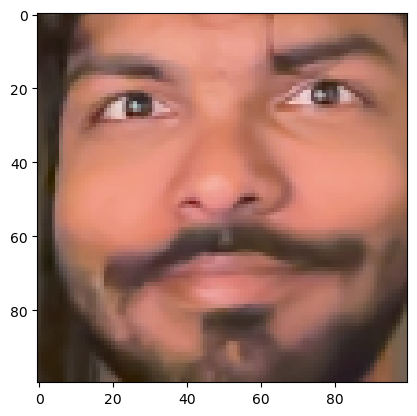

In [13]:
plt.imshow(img)

### Create Labelled Dataset

In [14]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [18]:
len(data)

50

In [19]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [20]:
samples = data.as_numpy_iterator()

In [21]:
exampple = samples.next()

In [22]:
exampple

(b'data/anchor/9d233ea2-aef1-11ee-8095-6e405208cd1e.jpg',
 b'data/positive/361d4bac-b04b-11ee-b498-6e405208cd1e.jpg',
 1.0)

### Build Train and Test Partition

In [23]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [24]:
res = preprocess_twin(*exampple)

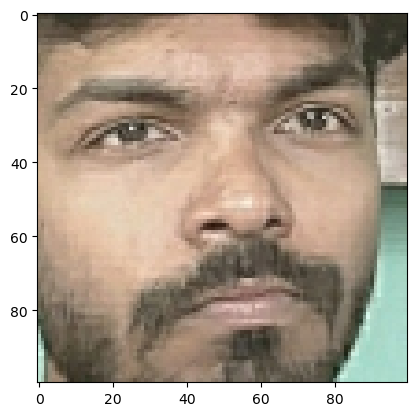

In [25]:
plt.imshow(res[1])

In [26]:
res[2]

1.0

In [27]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1000)

In [28]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [29]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Build Model

## Embedding Layer

In [30]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [31]:
embedding = make_embedding()

In [32]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

## Distance Layer

In [33]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [34]:
l1 = L1Dist()

## Siamese Model

In [35]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [36]:
siamese_model = make_siamese_model()

In [37]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Model Training

In [38]:
# Loss Function
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [39]:
# Optimizer
opt = tf.keras.optimizers.legacy.Adam(1e-4)

In [40]:
# Checkpoints
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [41]:
# Training Step

@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [42]:
from tensorflow.keras.metrics import Precision, Recall

In [43]:
# Training Loop

def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [44]:
EPOCHS = 15

In [45]:
train(train_data, EPOCHS)


 Epoch 1/15
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)


2024-01-11 12:05:08.152673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 5s 1s/step
0.66382205 0.5263158 1.0

 Epoch 2/15
3/3 [==============================] - 4s 1s/step
0.49276412 0.13333334 1.0

 Epoch 3/15
3/3 [==============================] - 4s 1s/step
0.52559674 0.3125 1.0

 Epoch 4/15
3/3 [==============================] - 4s 1s/step
0.4004409 0.7222222 1.0

 Epoch 5/15
3/3 [==============================] - 4s 1s/step
0.91244197 0.68421054 1.0

 Epoch 6/15
3/3 [==============================] - 4s 1s/step
0.07916711 0.94736844 1.0

 Epoch 7/15
3/3 [==============================] - 4s 1s/step
0.24680136 0.93333334 0.93333334

 Epoch 8/15
3/3 [==============================] - 4s 1s/step
0.2491068 0.875 1.0

 Epoch 9/15
3/3 [==============================] - 4s 1s/step
0.32253212 0.94736844 0.94736844

 Epoch 10/15
3/3 [==============================] - 4s 1s/step
0.45891994 0.88235295 1.0

 Epoch 11/15
3/3 [==============================] - 4s 1s/step
0.009121908 0.8235294 1.0

 Epoch 12/15
3/3 [============

# Evaluate Model

In [46]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [47]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 0s 54ms/step


array([[6.8223294e-06],
       [1.1013935e-04],
       [2.8616190e-04],
       [8.0213822e-06],
       [9.9896193e-01],
       [9.9976903e-01],
       [9.4353551e-01],
       [1.1259774e-03],
       [9.8434466e-01],
       [7.6316574e-05],
       [1.0526100e-05],
       [9.2233407e-01],
       [9.9934727e-01],
       [1.1998198e-03],
       [6.8530548e-01]], dtype=float32)

In [48]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]

In [49]:
y_true

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.],
      dtype=float32)

In [50]:
m = Recall()

m.update_state(y_true, y_hat)

m.result().numpy()

1.0

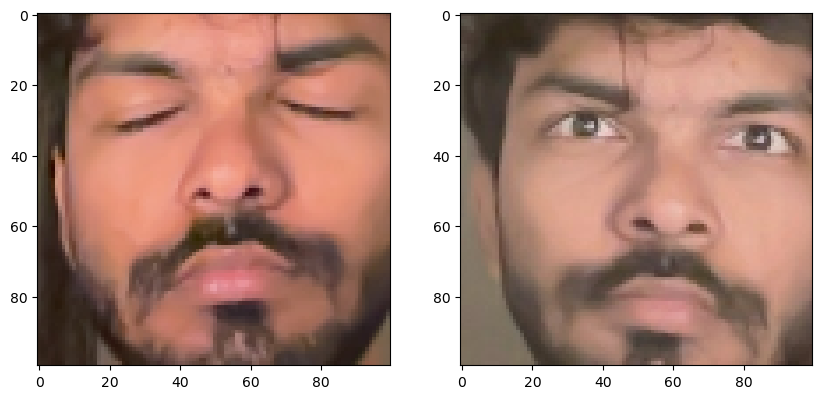

In [56]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[8])

# Renders cleanly
plt.show()

# Save Model

In [57]:
siamese_model.save('siamesemodelv3.h5')

/Users/rasswanth/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Realtime Test

In [58]:
model = tf.keras.models.load_model('siamesemodelv3.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [59]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [159]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [161]:
verify(model, 0.5, 0.5)

1/1 [==============================] - 0s 8ms/step


([array([[3.9513016e-06]], dtype=float32),
  array([[2.242177e-05]], dtype=float32),
  array([[2.5392208e-06]], dtype=float32),
  array([[2.6393948e-06]], dtype=float32),
  array([[4.8507104e-06]], dtype=float32),
  array([[1.6374239e-05]], dtype=float32),
  array([[4.0576193e-05]], dtype=float32)],
 False)